In [3]:
import tensorflow as tf
import numpy as np
import matplotlib.pylab as plt

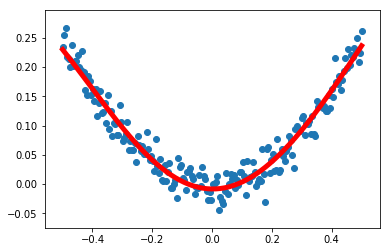

In [15]:
# 使用numpy生成200随机样本点
# 在-0.5-0.5中取值（均匀分布）
# 增加维度，生成200行，1列的数据
x_data = np.linspace(-0.5, 0.5, 200)[:, np.newaxis]  
noise = np.random.normal(0, 0.02, x_data.shape)
y_data = np.square(x_data) + noise

# 定义两个placeholder
x = tf.placeholder(tf.float32, [None, 1])
y = tf.placeholder(tf.float32, [None, 1])

# 构建神经网络中间层
# 定义权值
Weights_L1 = tf.Variable(tf.random_normal([1, 10]))
# 定义偏置量
biases_L1 = tf.Variable(tf.zeros([1, 10]))
# 信号总和
Wx_pplus_b_L1 = tf.matmul(x, Weights_L1) + biases_L1
# 激活函数，输出结果
L1 = tf.nn.tanh(Wx_pplus_b_L1)

# 定义神经网络输出层
Weights_L2 = tf.Variable(tf.random_normal([10, 1]))
biases_L2 = tf.Variable(tf.zeros([1, 1]))
Wx_plus_b_L2 = tf.matmul(L1, Weights_L2) + biases_L2
prediction = tf.nn.tanh(Wx_plus_b_L2)

# 二次代价函数
loss = tf.reduce_mean(tf.square(y - prediction))
# 梯度下降法
train_step = tf.train.GradientDescentOptimizer(0.1).minimize(loss)

with tf.Session() as sess:
    # 变量初始化
    sess.run(tf.global_variables_initializer())
    for _ in range(5000):
        sess.run(train_step, feed_dict={x:x_data, y:y_data})
        
    # 获得预测值
    prediction_value = sess.run(prediction, feed_dict={x:x_data})
    # 画图
    plt.figure()
    plt.scatter(x_data, y_data)
    plt.plot(x_data, prediction_value, 'r-', lw=5)
    plt.show()
    